In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [2]:
import cv2
from PIL import Image

In [3]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

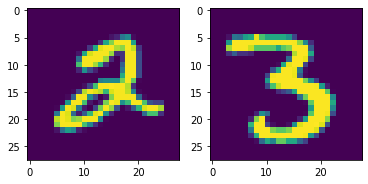

In [6]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(30,activation='tanh'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [9]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=50)

Epoch 1/50
1407/1407 [==============================] - 11s 6ms/step - loss: 0.9105 - accuracy: 0.6990 - val_loss: 0.7298 - val_accuracy: 0.7620
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6424 - accuracy: 0.7957 - val_loss: 0.6730 - val_accuracy: 0.7765
Epoch 3/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6797 - accuracy: 0.7736 - val_loss: 0.5639 - val_accuracy: 0.8135
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5318 - accuracy: 0.8281 - val_loss: 0.5210 - val_accuracy: 0.8305
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5015 - accuracy: 0.8424 - val_loss: 0.4636 - val_accuracy: 0.8495
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4645 - accuracy: 0.8536 - val_loss: 0.4265 - val_accuracy: 0.8675
Epoch 7/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.4442 - accuracy: 0.8592 - val_loss: 0.4273 - val_accura

In [10]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.9181


1 9


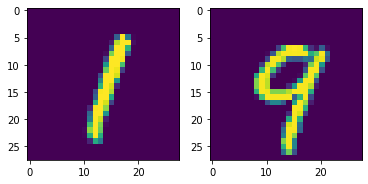

In [11]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [12]:
test_pred = model.predict(X_test)

In [13]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [14]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 962    0    1    1    0    3    6    2    4    1]
 [   0 1098    9    1    0    1    6    2   18    0]
 [  14   12  916   16   13    0   17   13   28    3]
 [   3    1   28  902    0   33    0   12   24    7]
 [   2    1    3    1  926    0   17    0    8   24]
 [  19    2    3   23    2  799   14    6   15    9]
 [  18    3    8    1   11   19  889    0    5    4]
 [   1   12   30    5    6    1    0  942    4   27]
 [  10    7   11   15    9   23   14    6  860   19]
 [   6    5    1    8   45   11    2   26   18  887]]


Text(0.5, 69.0, 'Predicted Labels')

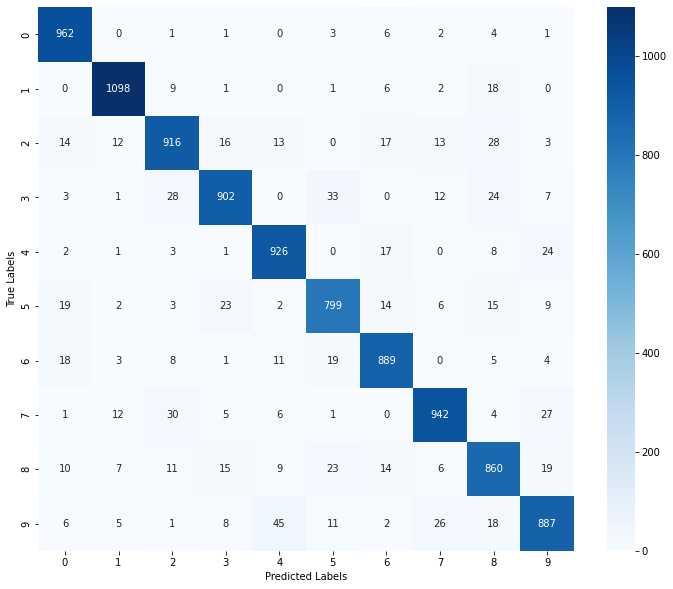

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

3

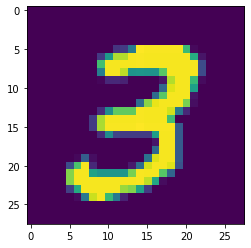

In [20]:
test_img = cv2.imread(r'MNIST_digit.png')
test_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
test_img = cv2.resize(test_img,(28,28))
plt.imshow(test_img)
scaled_img = test_img/255
img_reshape = np.reshape(scaled_img,[1,28,28])
input_pred = model.predict(img_reshape)
np.argmax(input_pred)